# Introduction

This notebook attempts to provide a solution to the problem of data loss in temperature in Celsius measurement in 10-minute intervals.

There are 2007 records in 600-second periods and data imputation is to be performed using different mechanisms.

In [14]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
 
# read the data from the csv
data = pd.read_csv("data.csv")
 
# display a resume of data
data.describe()

,33.2
count,2007.000000
mean,31.851505
std,8.492132
min,3.250000
25%,33.510000
50%,34.130000
75%,35.030000
max,36.540000


There are data that do not conform to the average. The minimum value is 3.25 while the average is around 33.2

If we show an interval, we can find anomalies in the data.

<AxesSubplot: >

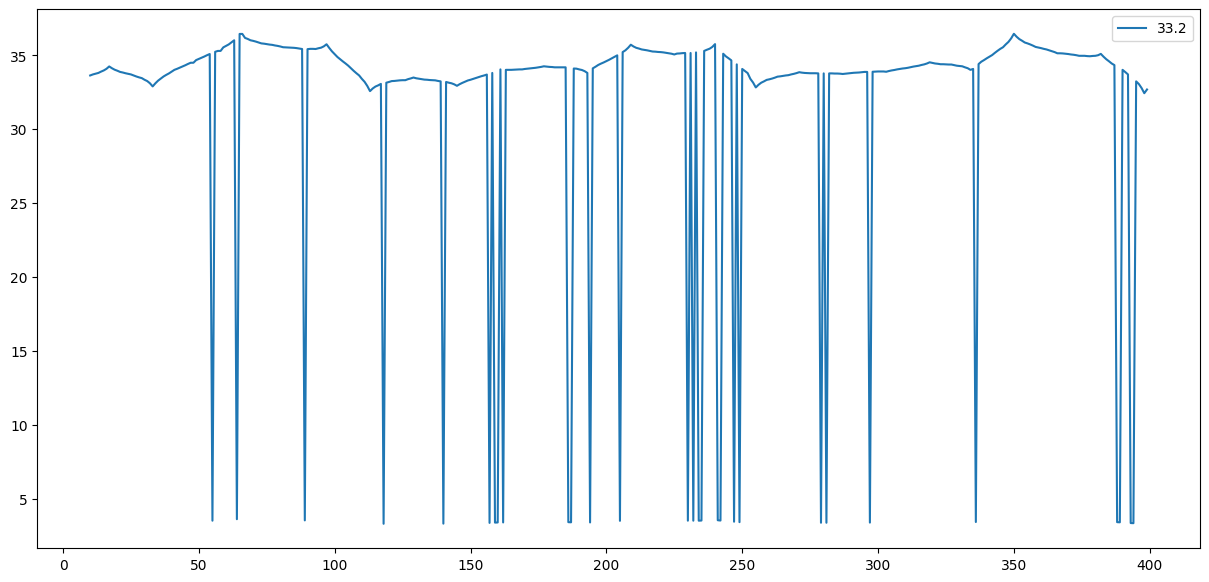

In [15]:
data[10:400].plot()

# Data Clean

The first step is to remove the erroneous values. To do so, we are going to study how they originate.

In a box diagram we see how the outliers are characterised by very small values.

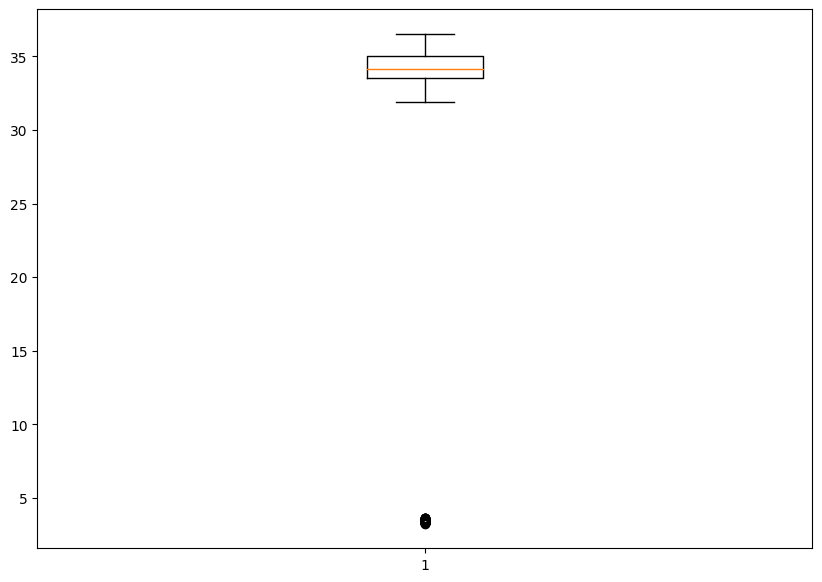

In [16]:
fig = plt.figure(figsize =(10, 7)) 
  
plt.boxplot(data) 
  
plt.show() 

Use a simple sequential algorithm to remove the values.

In [17]:
dataClean = list()
for i in data.values:
    if i < 30:
        dataClean.append(np.nan)
    else:
        dataClean.append(i)
dataClean = pd.DataFrame(dataClean)
dataClean.isnull().sum()

0    163
dtype: int64

Now we got 163 NaN values.

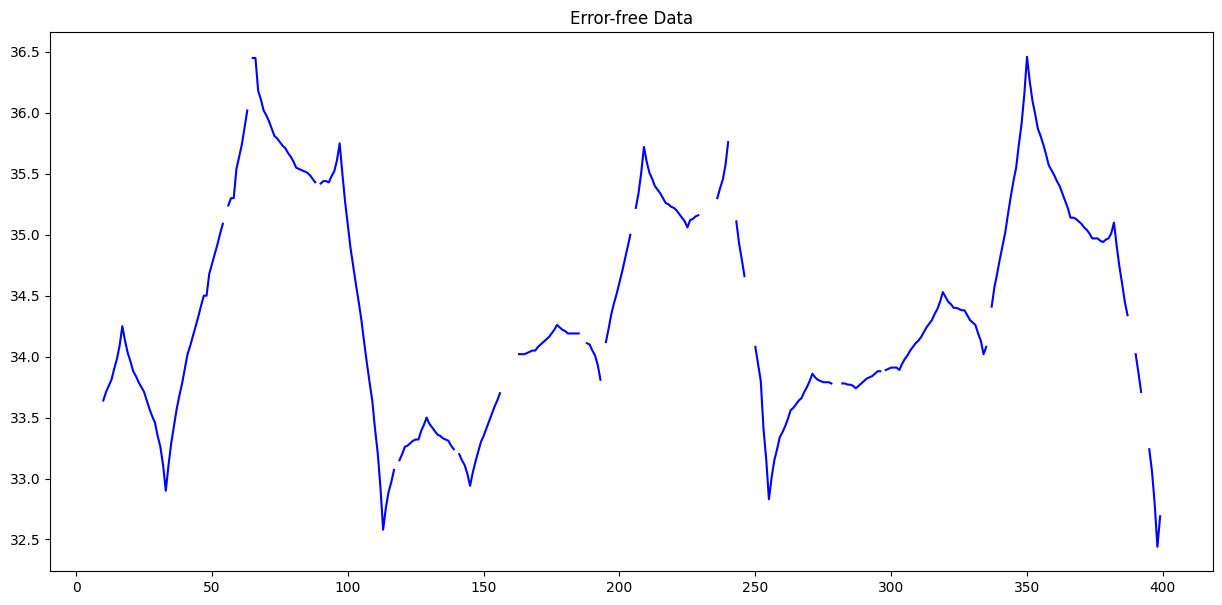

In [18]:
# set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(dataClean[10:400], color='blue')
# adds title to our time series plot
plt.title('Error-free Data') 
# print the plot
plt.show()

# Data Imputation

## Median

First try using an imputation based on the median.

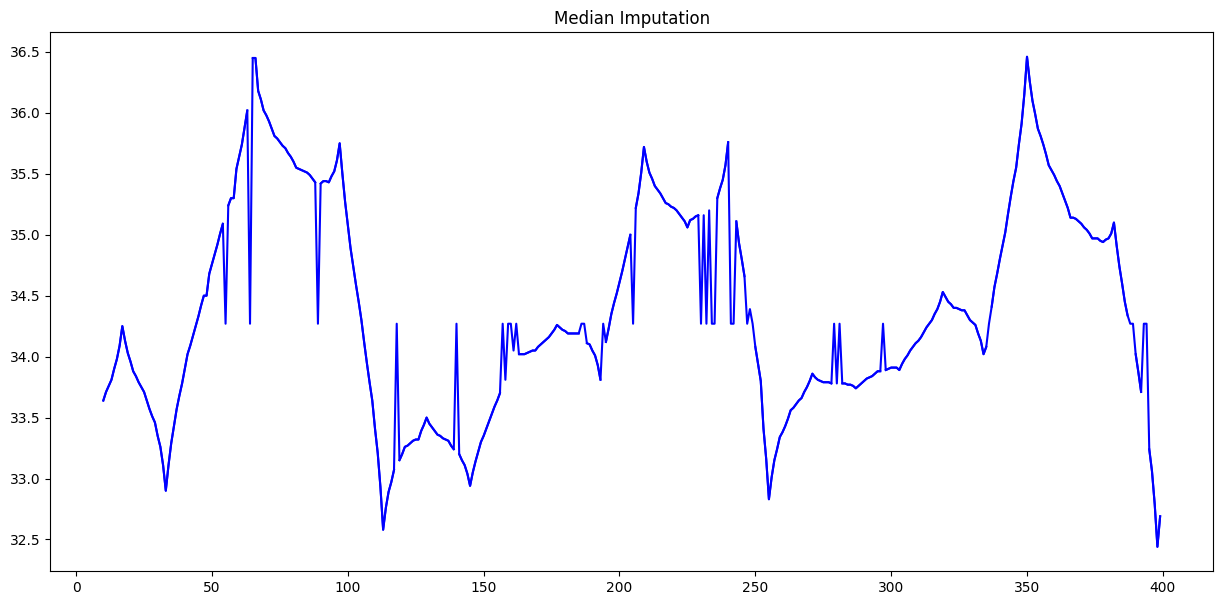

In [19]:
warnings.filterwarnings('ignore')
# set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the mean of the present observations
dataset = dataClean.assign(FillMean=dataClean.fillna(dataClean.median()))
# plots our series
plt.plot(dataset[10:400], color='blue')
# adds title to our time series plot
plt.title('Median Imputation')
# print the plot
plt.show()

This imputation mechanism does not generate a good result, because the values obtained are mean values.

## Mean

Using an imputation based on the mean.

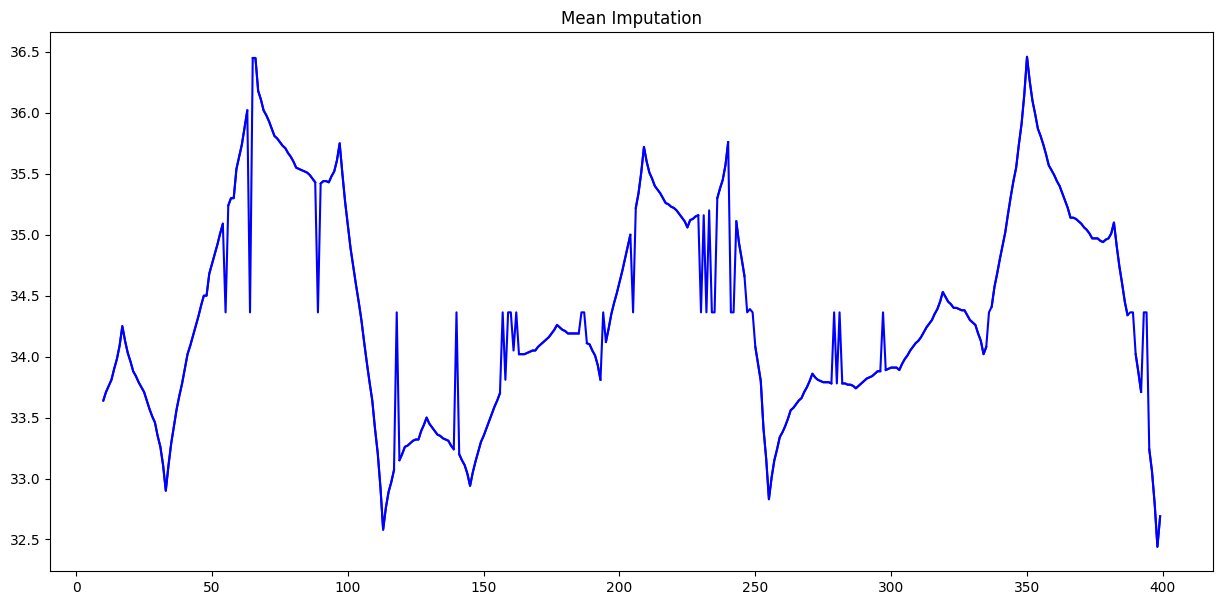

In [20]:
# set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the mean of the present observations
dataset = dataClean.assign(FillMean=dataClean.fillna(dataClean.mean()))
# plots our series
plt.plot(dataset[10:400], color='blue')
# add tittle to the plot
plt.title('Mean Imputation')
# print the plot
plt.show()

Similar to the previous case it is not a satisfactory solution.

## Last observation carried forward (LOCF)

Using an imputation based on the Last observation carried forward.

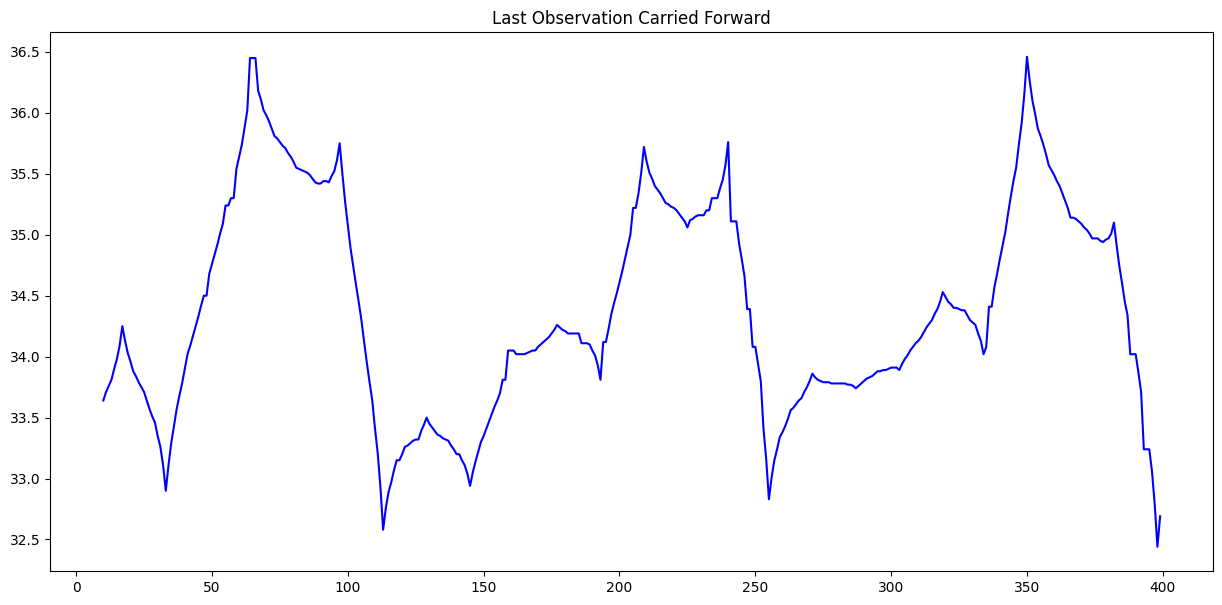

In [21]:
# figure size
plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
dataset= dataClean.fillna(method ='bfill')
# plot our time series with imputed values
plt.plot(dataset[10:400], color='blue')
#Plot tittle
plt.title('Last Observation Carried Forward')
# show the plot
plt.show()

In [22]:
data = pd.read_csv("dataSet.csv")
dataset.describe()

,0
count,2007
unique,360
top,[33.5]
freq,21


## Linear Interpolation

Lienar Interpolation originates from Numerical Analysis, which estimates unknown values by assuming linear relation within a range of data points, unlike linear extrapolation, which estimates data outside the range of the provided data points.

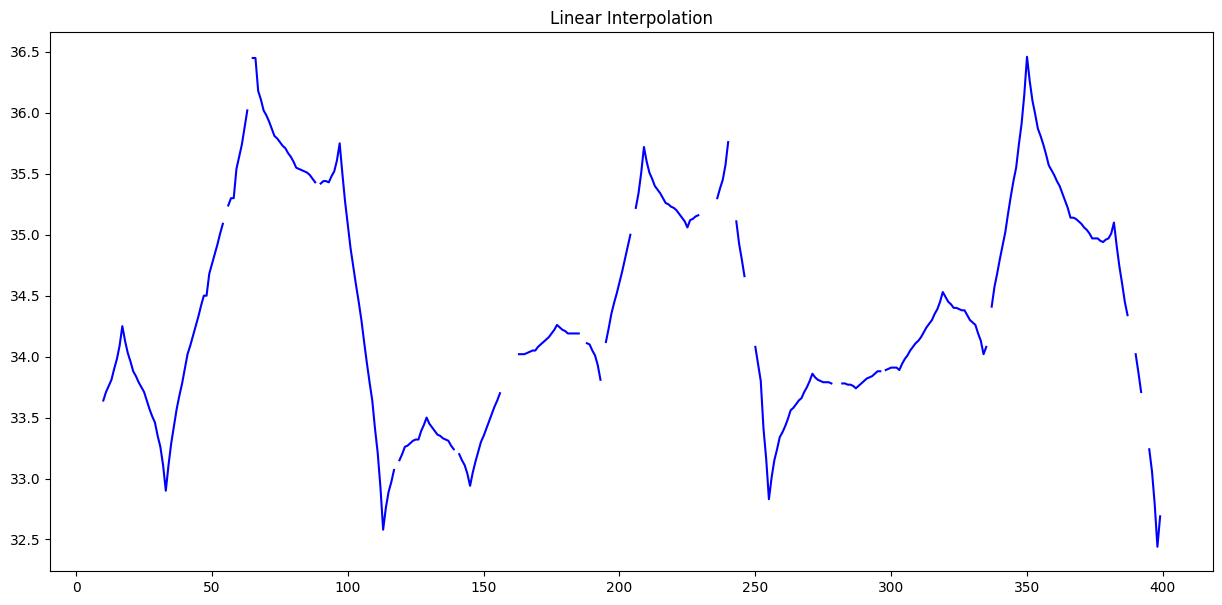

In [23]:
# figure size
plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
dataset = dataClean[0].interpolate(method='linear')
# plot our time series with imputed values
plt.plot(dataset[10:400], color='blue')
#Plot tittle
plt.title('Linear Interpolation')
# show the plot
plt.show()

## Spline interpolation

Spline interpolation using a mathematical function, the method estimates values that minimize overall curvature, thus obtaining a smooth surface passing through the input points

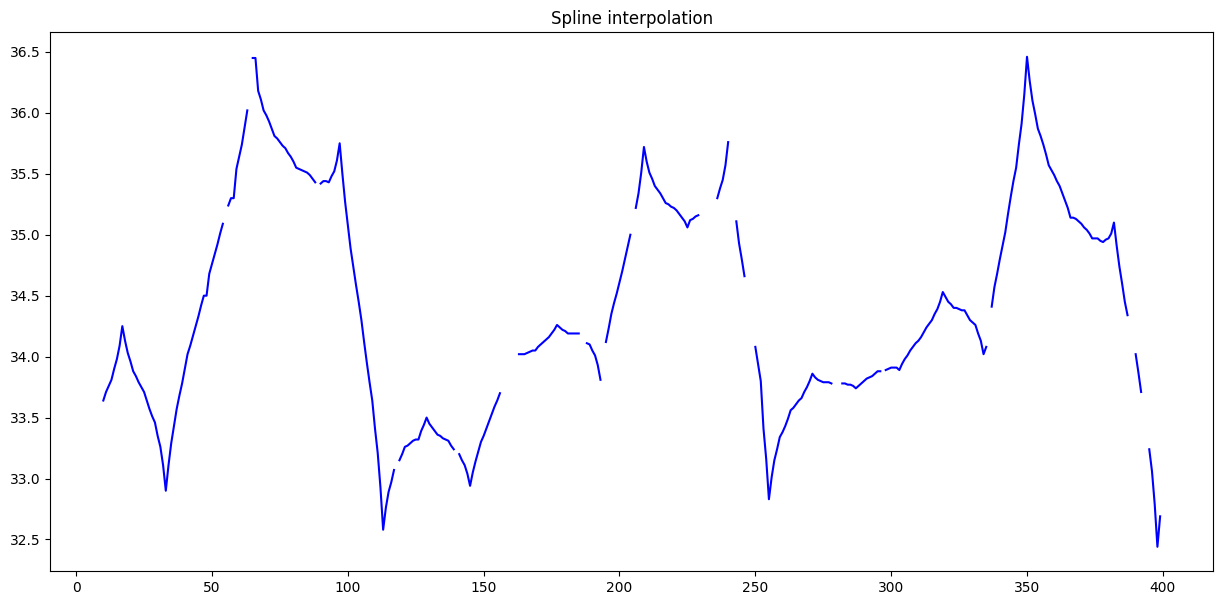

In [24]:
# figure size
plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
dataset= dataClean[0].interpolate(option='spline')
# plot our time series with imputed values
plt.plot(dataset[10:400], color='blue')
#Plot tittle
plt.title('Spline interpolation')
# show the plot
plt.show()

# Calculate Autocorrelation

Keep the data obtained using the Last Observation Carried Forward method because it is the one that has given us the best results.

In [25]:
dataSetImp.describe()

NameError: name 'dataSetImp' is not defined

In [26]:
# Load clean values
data = pd.read_csv("dataSet.csv")
values = pd.DataFrame(data.values)

# using shift function to shift the values.
dataframe = pd.concat([values.shift(288), values.shift(144),
                       values.shift(72), values.shift(36), values.shift(0), values], axis=1)
# naming the columns
dataframe.columns = ['t', 't+0', 't+6', 't+12', 't+24', 't+48']

result = dataframe.corr()

print(result)

             t       t+0       t+6      t+12      t+24      t+48
t     1.000000  0.756026 -0.631079 -0.052500  0.779114  0.779114
t+0   0.756026  1.000000 -0.639972 -0.018234  0.752966  0.752966
t+6  -0.631079 -0.639972  1.000000 -0.074529 -0.632459 -0.632459
t+12 -0.052500 -0.018234 -0.074529  1.000000 -0.101326 -0.101326
t+24  0.779114  0.752966 -0.632459 -0.101326  1.000000  1.000000
t+48  0.779114  0.752966 -0.632459 -0.101326  1.000000  1.000000


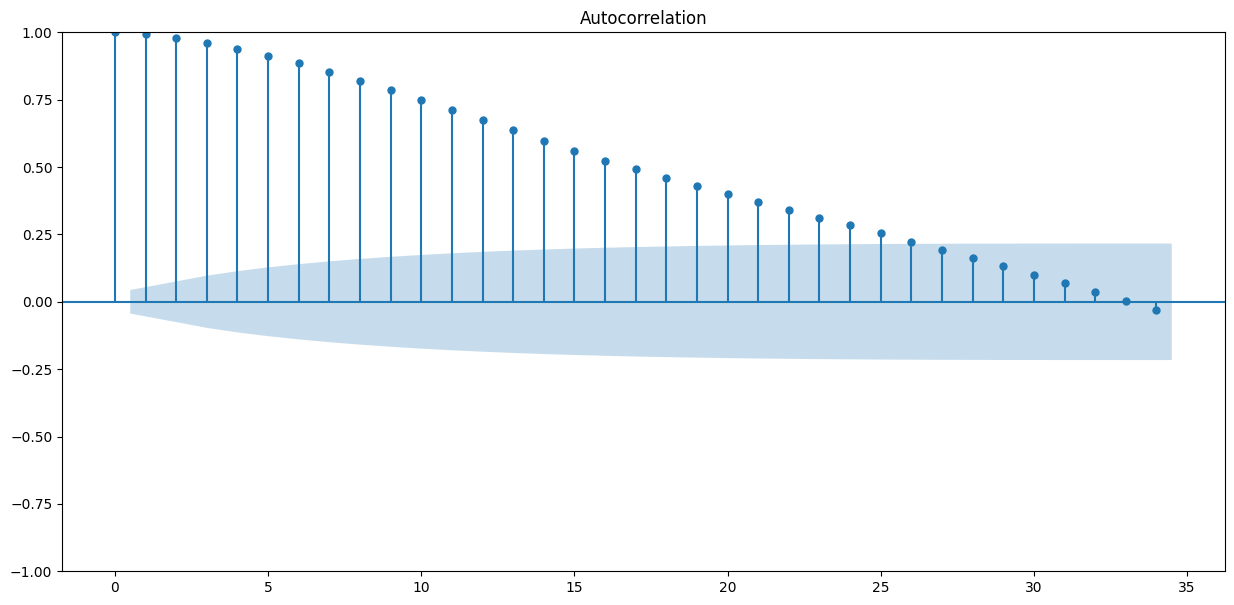

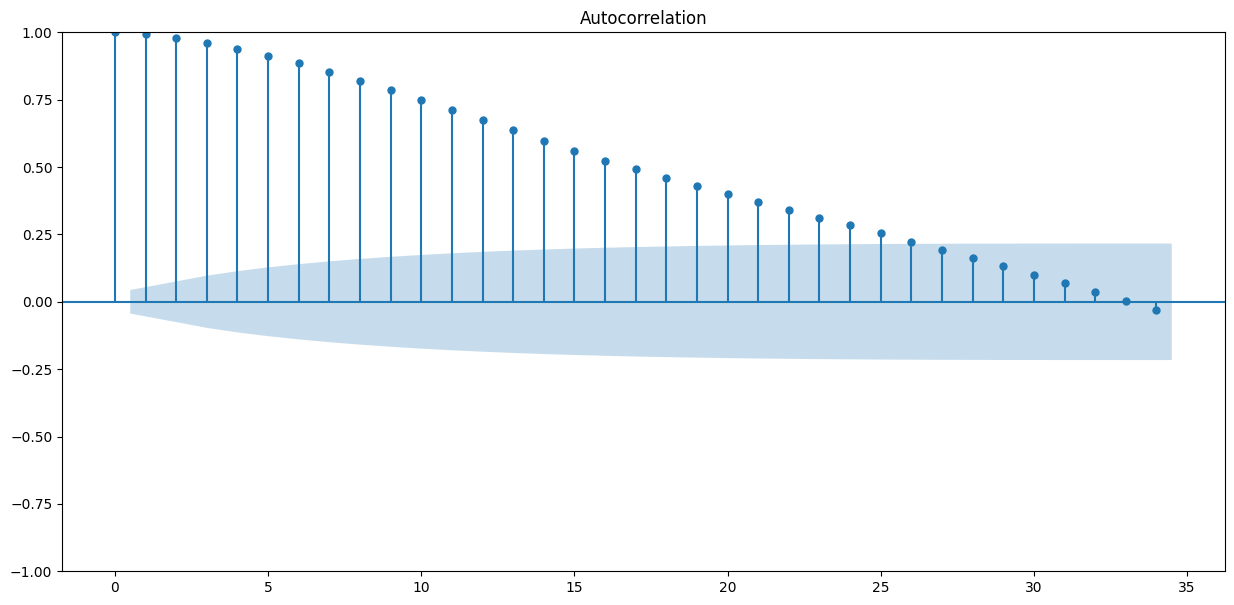

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

# Correlation respect a mobile windows

In [28]:
from scipy.stats import pearsonr
correlationTable= list()
data24=values[0:144][0]
for i in range(144, 1863):
    window = values[i:i+144][0]
    corr, _ = pearsonr(data24, window)
    correlationTable.append(corr)

dict = {'Correlation' : correlationTable }
df = pd.DataFrame(dict)
display(df.transpose())

,0,1,2,3,4,5,6,7,8,9,...,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718
Correlation,0.91995,0.919827,0.913397,0.902363,0.887705,0.868989,0.847071,0.823077,0.797418,0.770694,...,0.670152,0.703413,0.735523,0.766708,0.796257,0.824134,0.850182,0.873837,0.895161,0.913842


In [29]:
correlationTable.index(max(correlationTable))

713

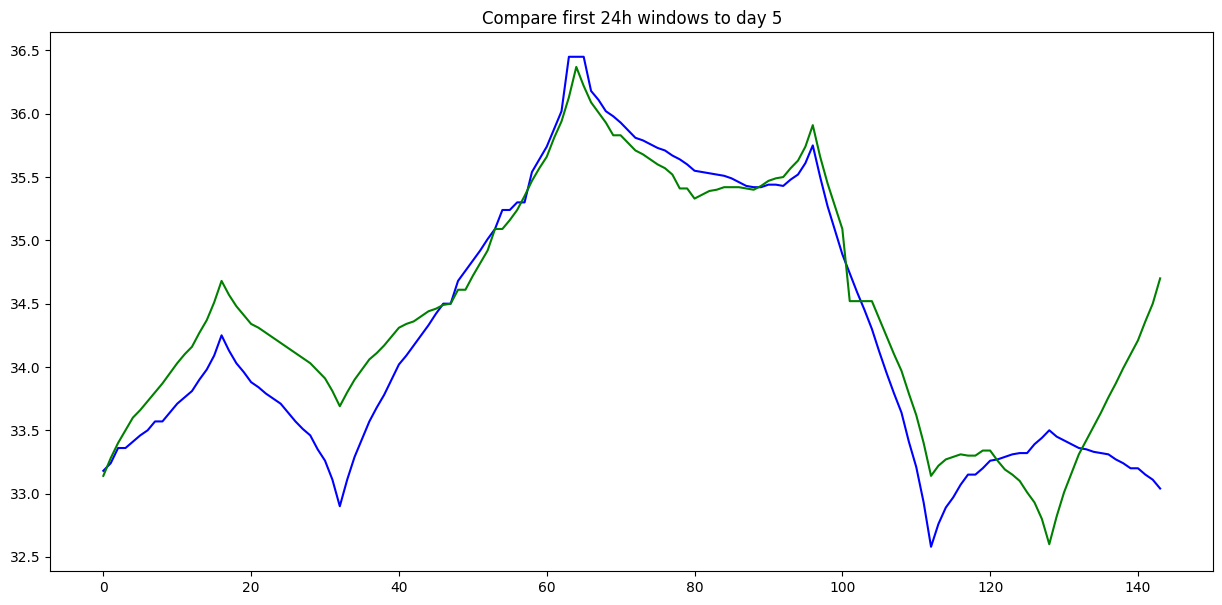

In [30]:
plt.plot(data24.values, color='blue')
plt.plot(values[713+144:713+144+144].values, color='green')
#Plot tittle
plt.title('Compare first 24h windows to day 5')
# show the plot
plt.show()

We can say that day 1 and day 5 are similar.

# Calculate the average circadian temperature

First we must calculate the k-value for which we detect a daily cycle in our time data.

Period = 600s

Samples per day = 144 samples

In [31]:
dataByDay = list()
for i in range(14):
    dataByDay.append(values[0+144*i:144+144*i])

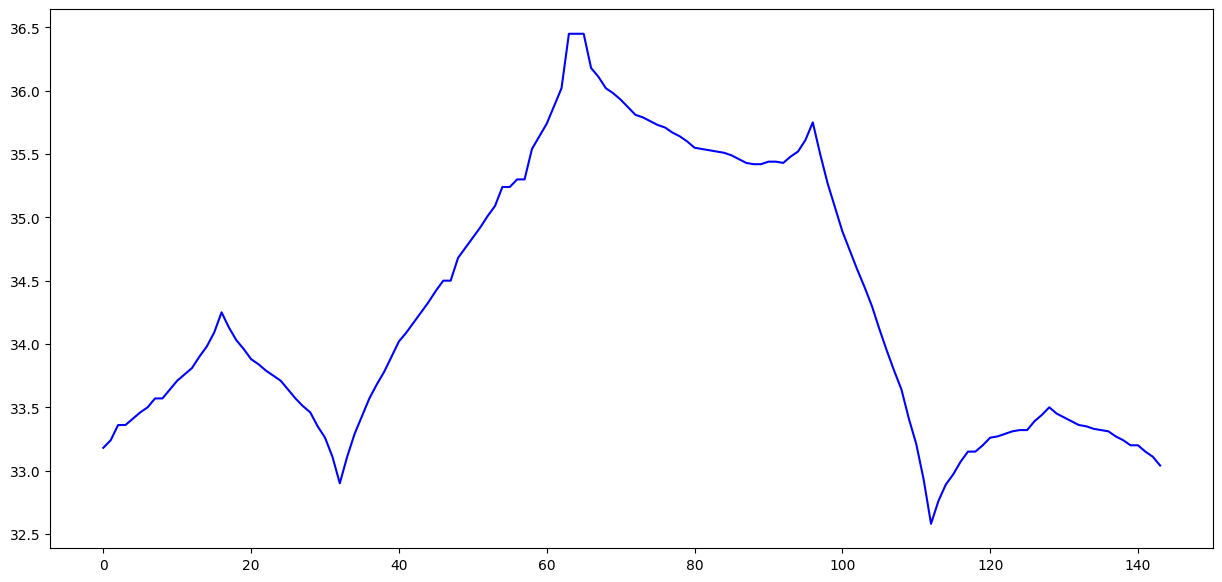

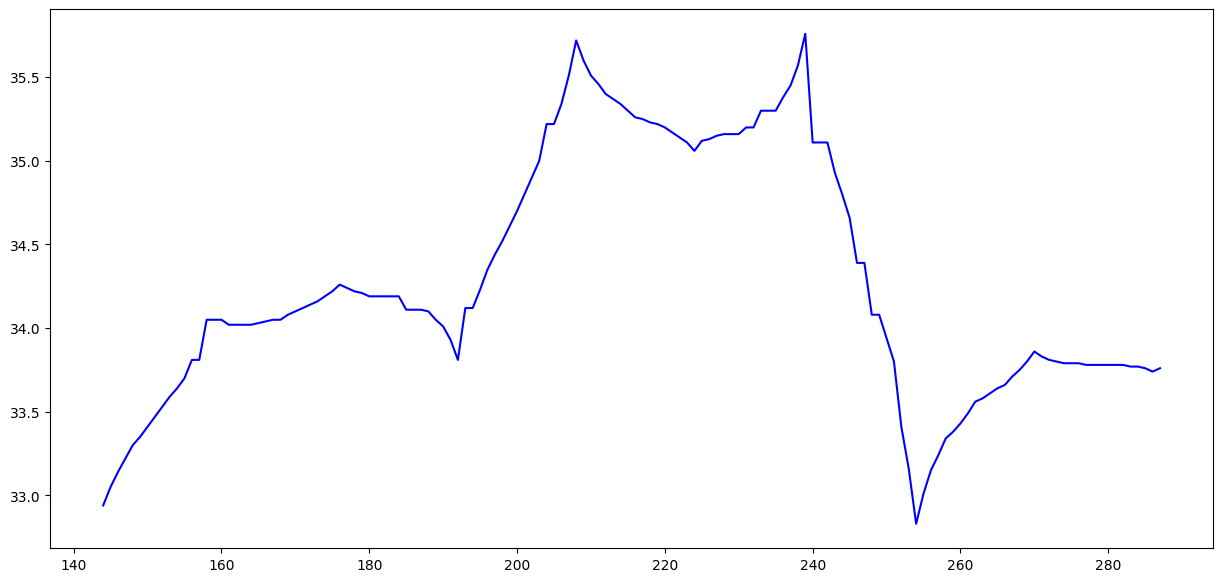

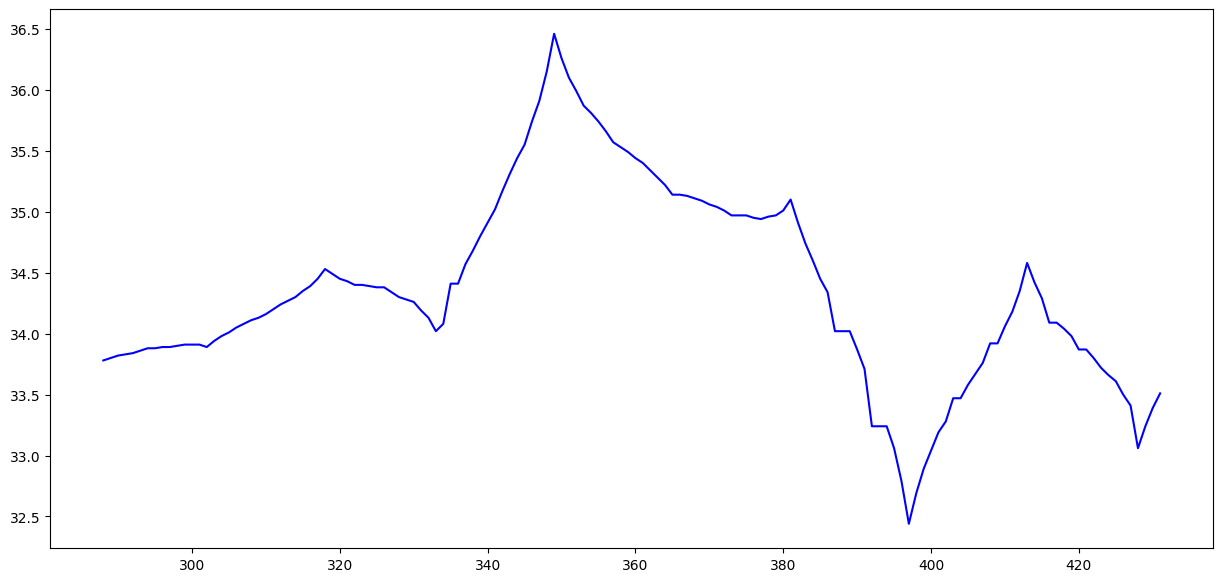

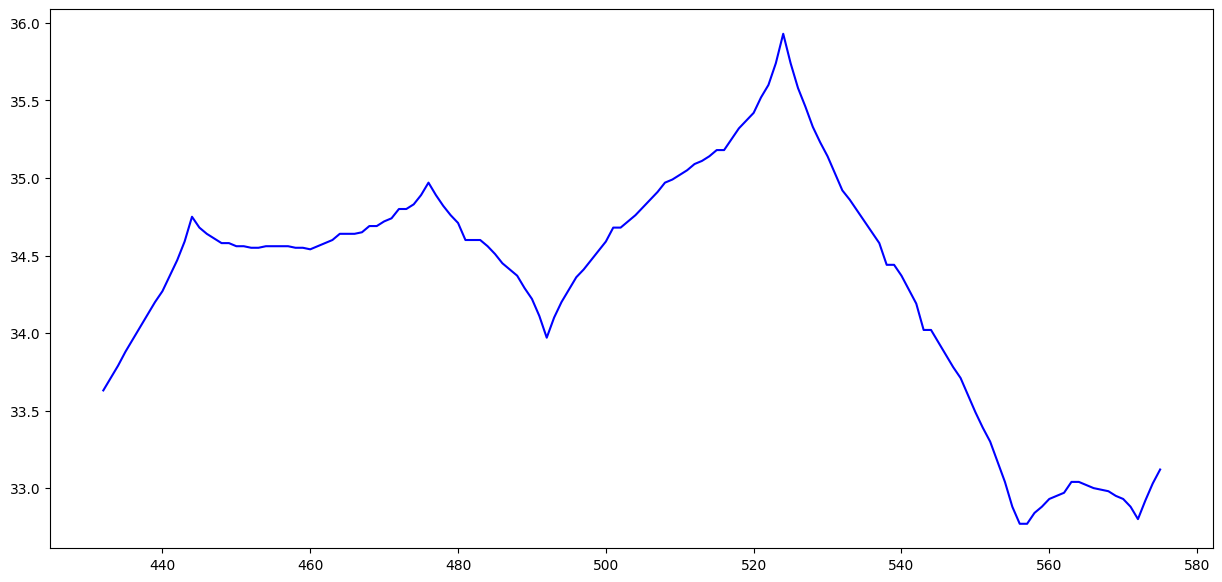

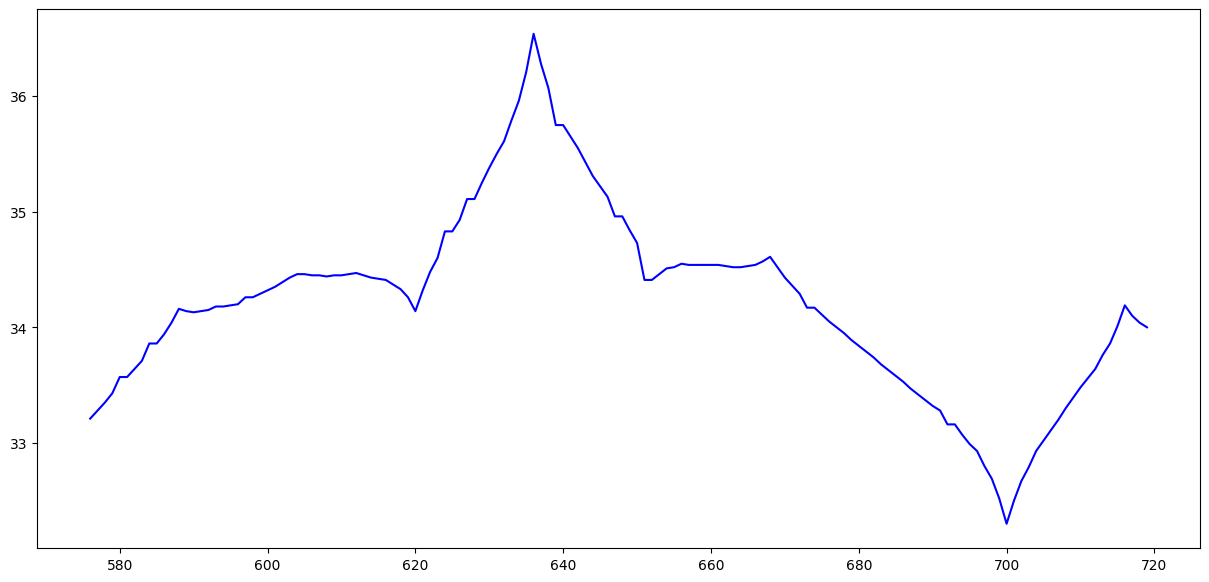

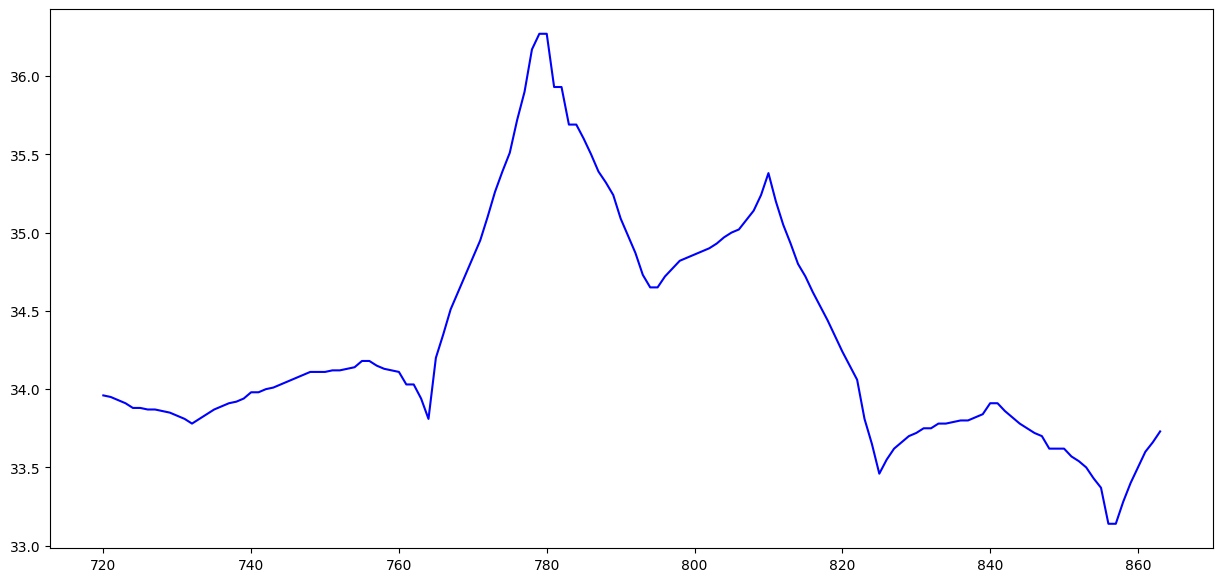

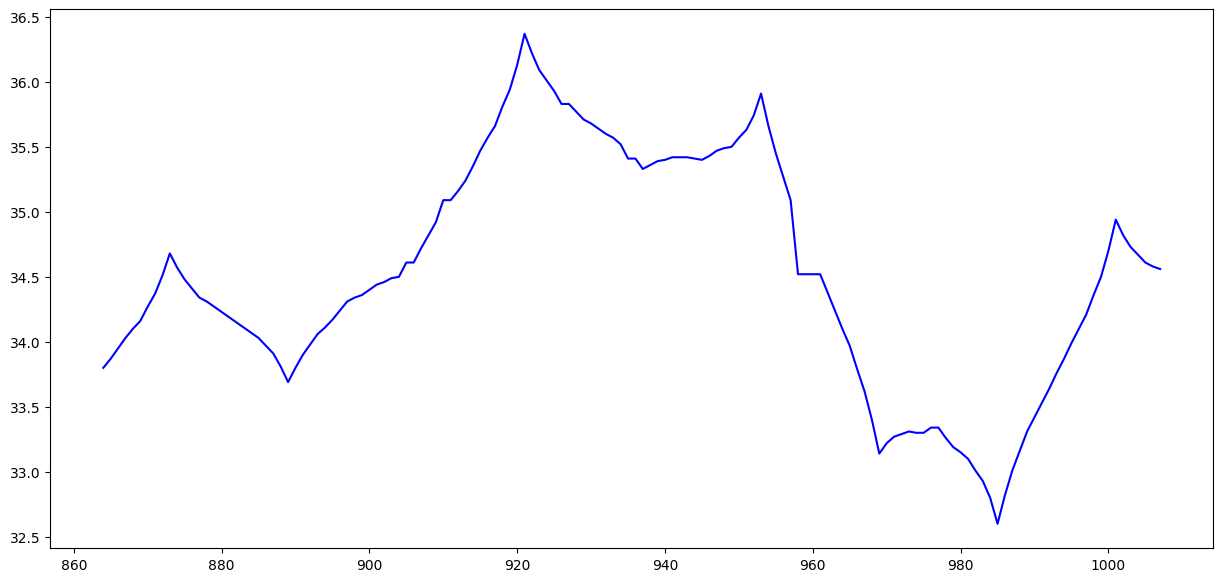

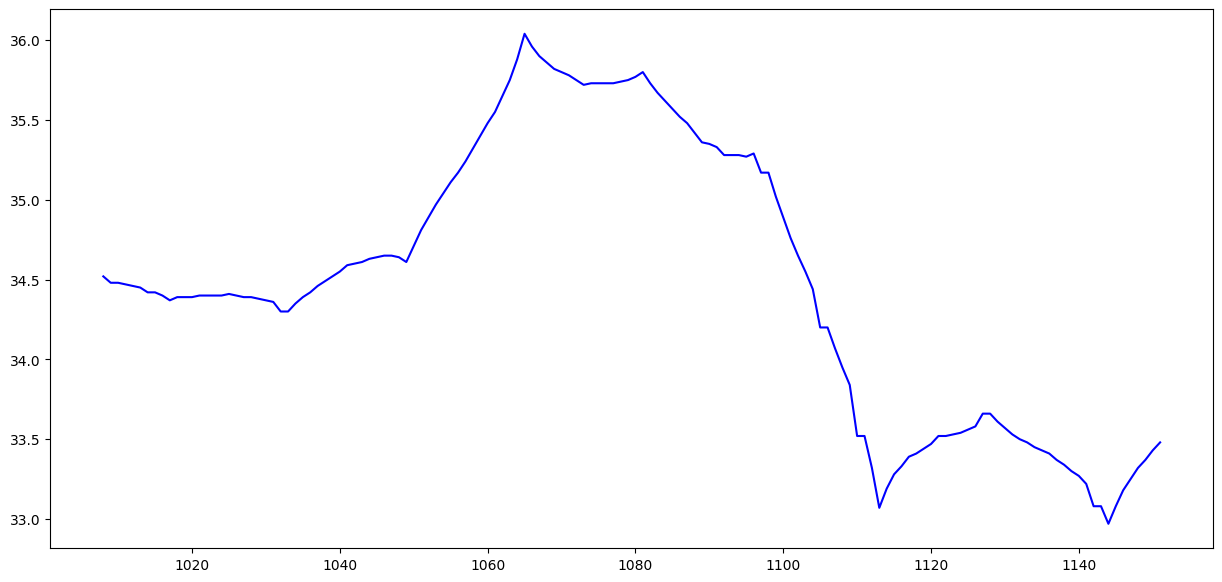

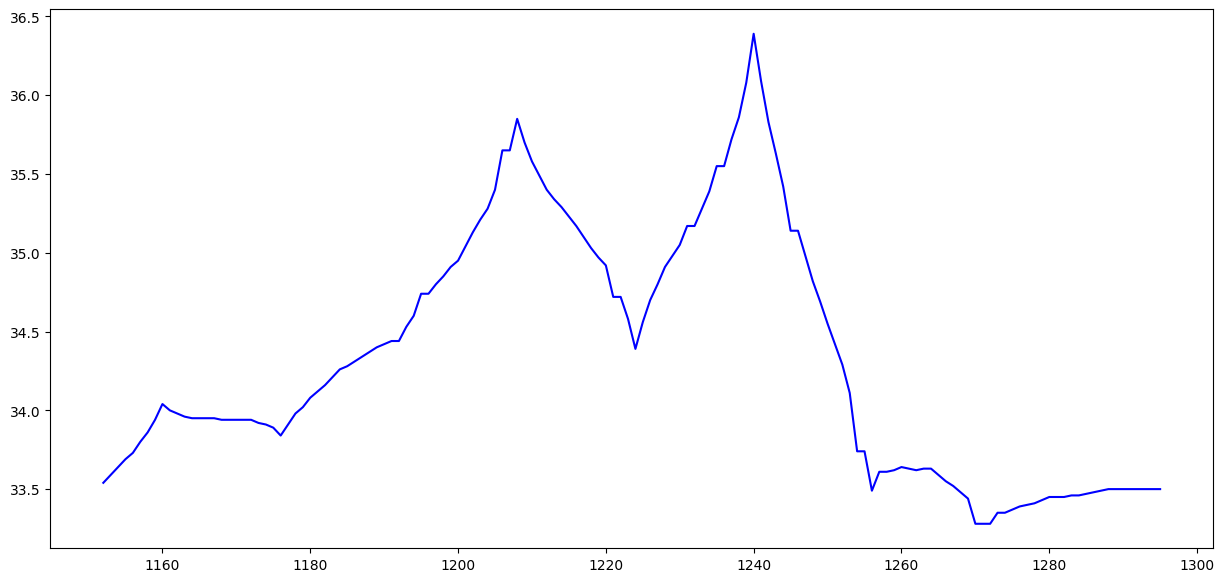

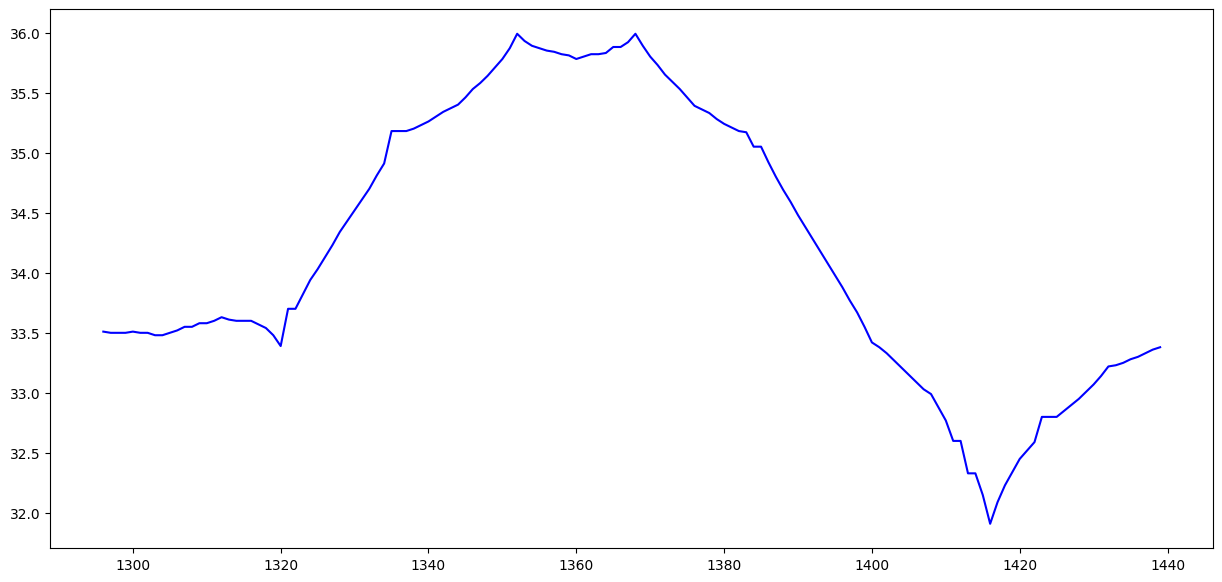

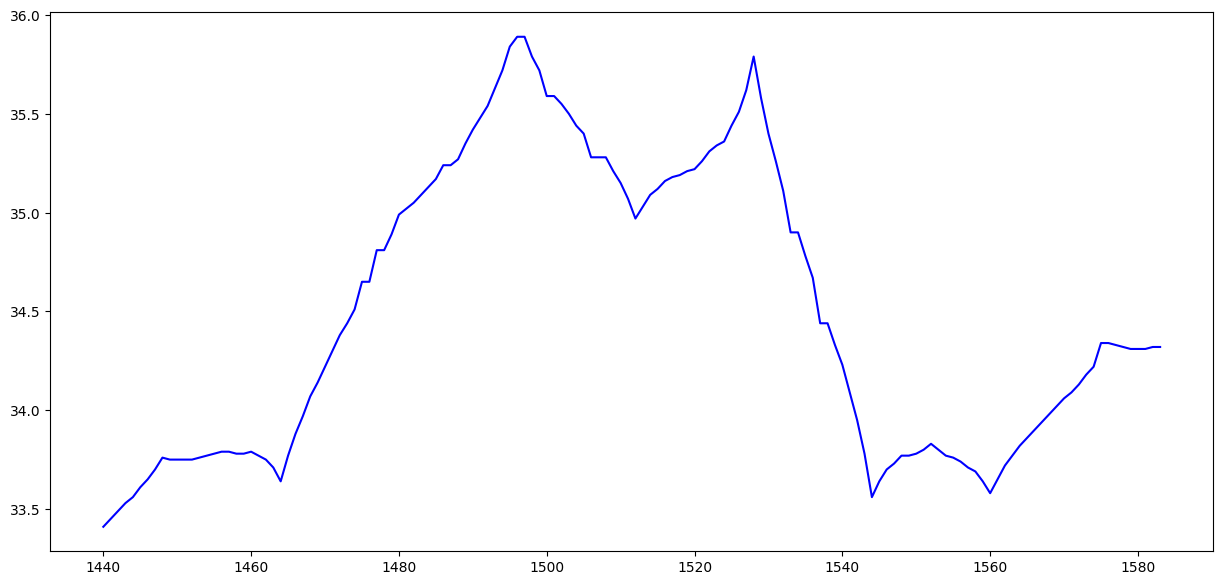

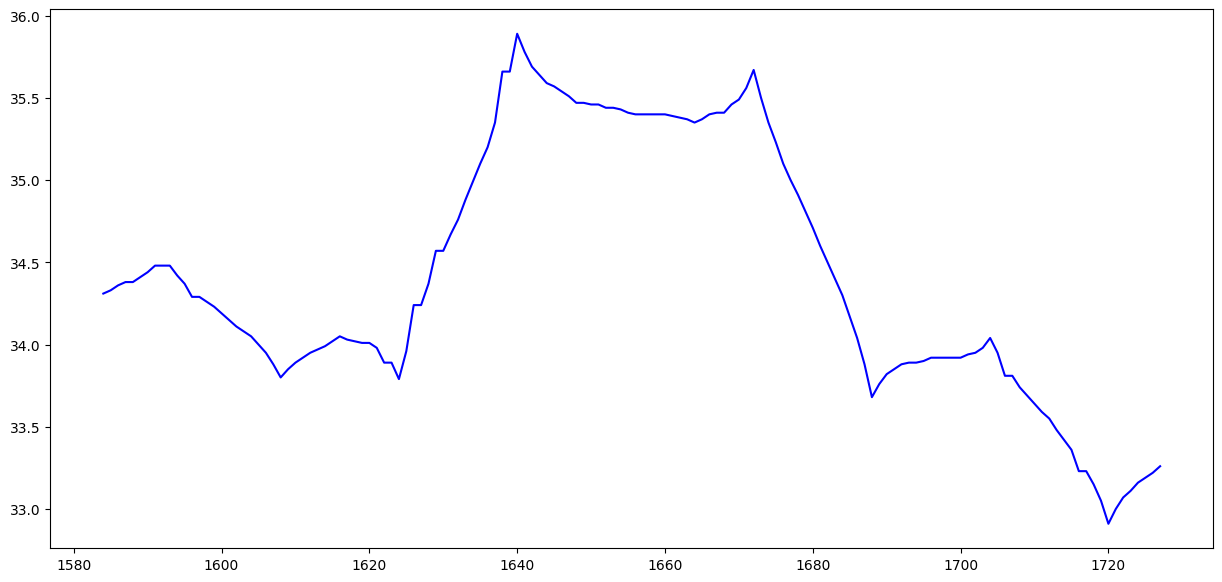

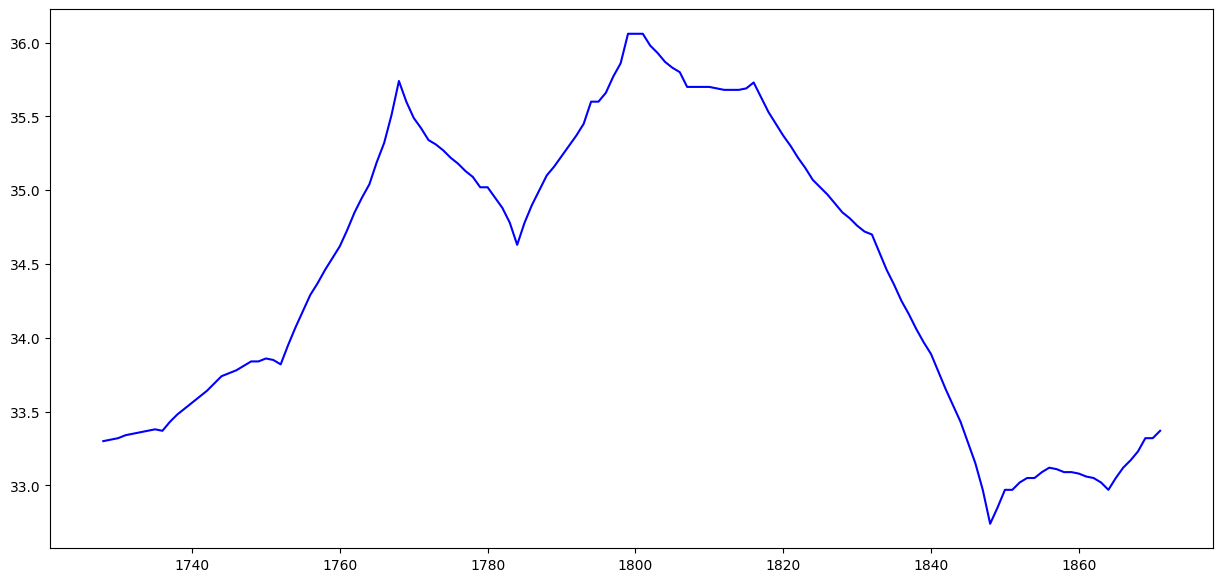

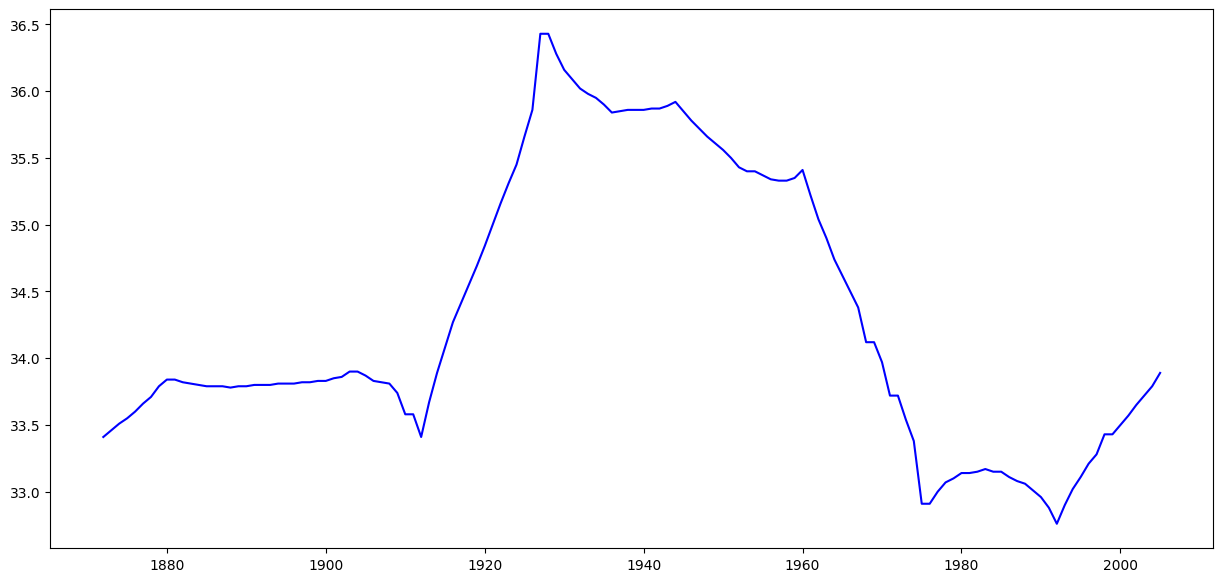

In [32]:
for data in dataByDay:
    plt.plot(data, color='blue')
    plt.show()

In [33]:
import statistics

averageTable = list()
for data in dataByDay:
    average = statistics.mean(data[0])
    averageTable.append(average)

dict = {'Average' : averageTable }
df = pd.DataFrame(dict)
display(df.transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Average,34.302014,34.281528,34.369306,34.342222,34.217708,34.315417,34.526389,34.496597,34.337431,34.212986,34.498194,34.423264,34.442222,34.298284


Which day is most similar to the first in terms of average?

In [34]:
min = float("inf")
day = -1
for a in averageTable:
    if (a != averageTable[0] and abs(a-averageTable[0]) < min):
        min = abs(a-averageTable[0])
        day = averageTable.index(a)

print(day)

13


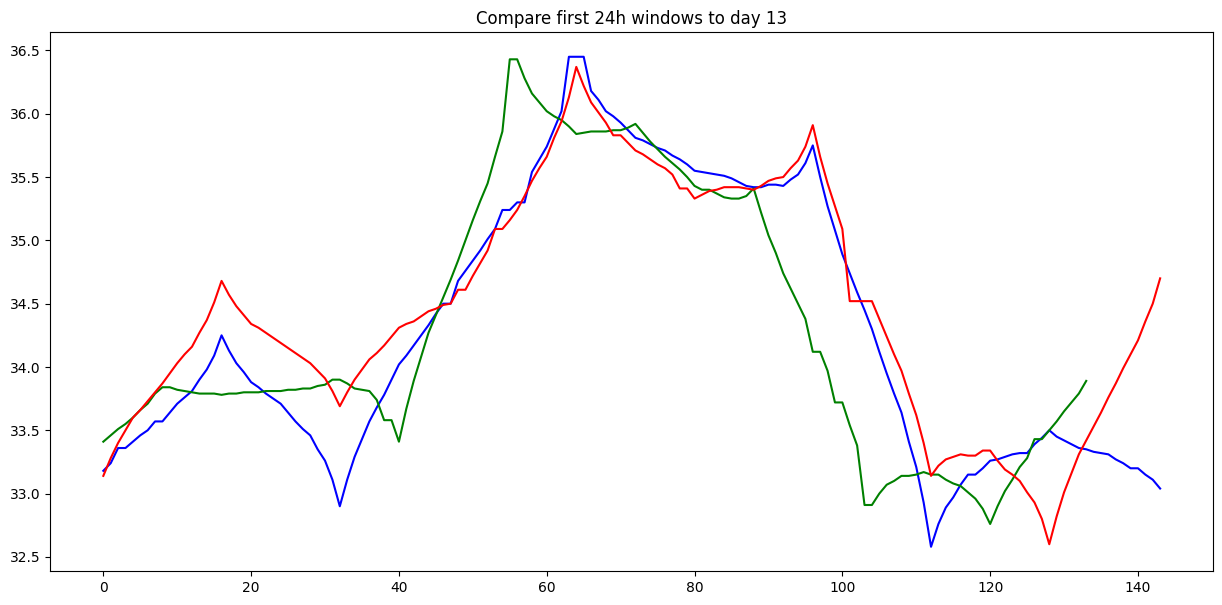

In [39]:
plt.plot(dataByDay[0].values, color='blue')
plt.plot(dataByDay[13].values, color='green')
plt.plot(values[713+144:713+144+144].values, color='red')
#Plot tittle
plt.title('Compare first 24h windows to day 14')
# show the plot
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(dataByDay[0][0:134].values, dataByDay[13].values, squared=False)
rms2 = mean_squared_error(dataByDay[0].values, values[713+144:713+144+144].values, squared=False)
print(rms)
print(rms2)

0.5340880077290638
0.39559290944100606
